In [2]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt
import glob
import cv2
import mmdet
from mmdet.apis import init_detector, inference_detector
from mmdet.datasets import replace_ImageToTensor, build_dataset, build_dataloader
from mmdet.datasets.pipelines import Compose
from mmdet.core import bbox_cxcywh_to_xyxy, bbox_xyxy_to_cxcywh, bbox_xyxy_to_cxcywh
from tqdm import tqdm
import pickle
from mmdet.core.bbox.iou_calculators.iou2d_calculator import BboxOverlaps2D
import lap
import json
import cv2
from bounding_box import bounding_box as bb
import os

In [3]:
os.getcwd()

'/work/mvadera_umass_edu/mmdetection/notebooks'

In [4]:
with open('../../logs/detr_r50_4x16_decoder_and_output/merged_outputs_07.json', 'r') as f:
    results = json.load(f)

In [5]:
list(results.keys())[:10]

['000000397133.jpg',
 '000000037777.jpg',
 '000000252219.jpg',
 '000000087038.jpg',
 '000000174482.jpg',
 '000000403385.jpg',
 '000000006818.jpg',
 '000000480985.jpg',
 '000000458054.jpg',
 '000000331352.jpg']

In [6]:
with open('../../checkpoints/output_detr_r50_8x2_150e_coco_20201130_194835-2c4b8974.pkl', 'rb') as file:
    base_detr_output = pickle.load(file)

In [7]:
base_detr_output[0]

{'filename': 'data/coco/val2017/000000397133.jpg',
 'ori_filename': '000000397133.jpg',
 'ori_shape': (427, 640, 3),
 'img_shape': (800, 1199, 3),
 'pad_shape': (800, 1199, 3),
 'scale_factor': array([1.8734375, 1.8735363, 1.8734375, 1.8735363], dtype=float32),
 'flip': False,
 'flip_direction': None,
 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32),
  'std': array([58.395, 57.12 , 57.375], dtype=float32),
  'to_rgb': True},
 'batch_input_shape': (800, 1199),
 'query_embeds': array([[[-2.4713592e-01, -8.5159832e-01,  3.2657299e+00, ...,
          -4.7588013e-02,  6.0819685e-01, -2.0238226e-02],
         [ 2.5194043e-01, -4.9501327e-01,  2.4316292e+00, ...,
          -1.1057177e+00,  1.1674594e+00, -8.8785315e-01],
         [-1.0490856e+00,  8.7567395e-01,  2.0396304e+00, ...,
          -6.0393667e-01,  4.1521204e-01, -2.4618927e-01],
         ...,
         [-7.3646516e-01,  1.0061543e+00,  2.0406060e+00, ...,
          -6.9134876e-02, -3.7811255e-01, -1.11160

In [8]:
gt_bboxes = base_detr_output[7]['gt_bboxes']
print(len(gt_bboxes))

13


In [9]:
img_filename = '000000480985'

17


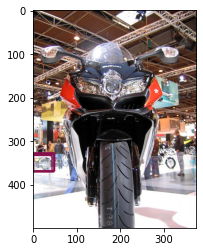

In [10]:
in_path = '../../data/coco/val2017/%s.jpg' % img_filename
# out_path = os.path.join("docs", "images", "winton_bb.png")
image = cv2.imread(in_path, cv2.IMREAD_COLOR)

img_results = results['%s.jpg'%img_filename]
print(len(img_results[1]))
clusters = img_results[1][1]

for result in clusters:    
    bb.add(image, result[-4], result[-3], result[-2], result[-1], " ", "maroon")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
x = img_results[1]
cluster_variances = [torch.tensor(x[i])[:, -4:].var(dim=0) for i in range(len(x))]

In [40]:
torch.stack(cluster_variances)

tensor([[4.9942e+00, 6.9016e-01, 6.1937e-01, 1.2389e-01],
        [2.5388e-01, 2.6536e+00, 2.7674e+00, 9.0964e-01],
        [9.2546e+00, 1.7143e+00, 5.0158e-01, 1.7763e-01],
        [9.1799e-01, 1.1221e-01, 1.4370e+00, 1.0993e-01],
        [5.3718e+00, 7.8517e+01, 5.3287e-01, 2.4149e+00],
        [1.5672e+00, 4.1218e-01, 5.4532e-01, 8.2014e-01],
        [8.3409e-02, 1.2418e-01, 5.6305e-04, 7.2134e-01],
        [1.2788e+00, 6.8961e-01, 1.0633e+00, 1.9068e+00],
        [2.6545e-01, 2.8591e-01, 3.5981e-01, 2.8678e-01],
        [2.1226e-01, 1.0657e-01, 2.0439e-01, 4.8763e-01],
        [1.9129e-01, 2.7779e-01, 1.4998e-01, 3.1617e-01],
        [4.5238e+00, 9.8834e-01, 2.5816e+00, 6.8167e+00],
        [1.9095e+00, 3.9858e+00, 9.6415e-01, 5.9604e-01],
        [4.2773e+00, 1.6036e+00, 4.7582e+00, 9.0580e-01],
        [8.0564e-01, 8.1949e-01, 6.7748e-04, 4.1779e+01],
        [5.3353e-05, 1.3241e+00, 1.8623e+00, 4.3133e-01],
        [1.4365e+00, 9.5930e-01, 1.7555e+00, 5.8232e+00]])

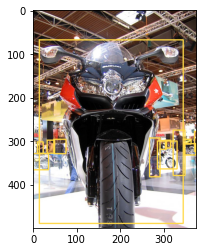

In [12]:
in_path = '../../data/coco/val2017/%s.jpg' % img_filename
# out_path = os.path.join("docs", "images", "winton_bb.png")
image = cv2.imread(in_path, cv2.IMREAD_COLOR)
gt_bboxes = gt_bboxes.tolist()

for result in gt_bboxes:    
    bb.add(image, result[-4], result[-3], result[-2], result[-1], " ", "yellow")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
np.array(results['%s.jpg'%img_filename][1][4])[:, -4:]

array([[ 81.87775421, 346.87414551, 102.59021759, 398.31439209],
       [ 78.27677155, 340.269104  , 102.50554657, 399.144104  ],
       [ 80.94915009, 346.25656128, 102.72562408, 398.93417358],
       [ 79.10203552, 345.17828369, 101.86946869, 399.94488525],
       [ 78.72533417, 341.10061646, 102.55990601, 399.62802124],
       [ 78.71170807, 337.89959717, 102.70014191, 398.56829834],
       [ 80.33120728, 346.28094482, 102.03490448, 399.39086914],
       [ 75.90864563, 324.32189941, 101.59179688, 396.00332642],
       [ 74.27861786, 326.61981201, 102.88104248, 402.37207031],
       [ 76.00660706, 326.39505005, 103.43566132, 397.70153809],
       [ 77.51301575, 336.862854  , 102.65319061, 399.83087158],
       [ 76.39120483, 326.9883728 , 104.31948853, 397.63793945],
       [ 75.17313385, 326.85858154, 101.73114014, 397.37783813]])

In [41]:
y = torch.stack(cluster_variances)

In [43]:
y

tensor([[4.9942e+00, 6.9016e-01, 6.1937e-01, 1.2389e-01],
        [2.5388e-01, 2.6536e+00, 2.7674e+00, 9.0964e-01],
        [9.2546e+00, 1.7143e+00, 5.0158e-01, 1.7763e-01],
        [9.1799e-01, 1.1221e-01, 1.4370e+00, 1.0993e-01],
        [5.3718e+00, 7.8517e+01, 5.3287e-01, 2.4149e+00],
        [1.5672e+00, 4.1218e-01, 5.4532e-01, 8.2014e-01],
        [8.3409e-02, 1.2418e-01, 5.6305e-04, 7.2134e-01],
        [1.2788e+00, 6.8961e-01, 1.0633e+00, 1.9068e+00],
        [2.6545e-01, 2.8591e-01, 3.5981e-01, 2.8678e-01],
        [2.1226e-01, 1.0657e-01, 2.0439e-01, 4.8763e-01],
        [1.9129e-01, 2.7779e-01, 1.4998e-01, 3.1617e-01],
        [4.5238e+00, 9.8834e-01, 2.5816e+00, 6.8167e+00],
        [1.9095e+00, 3.9858e+00, 9.6415e-01, 5.9604e-01],
        [4.2773e+00, 1.6036e+00, 4.7582e+00, 9.0580e-01],
        [8.0564e-01, 8.1949e-01, 6.7748e-04, 4.1779e+01],
        [5.3353e-05, 1.3241e+00, 1.8623e+00, 4.3133e-01],
        [1.4365e+00, 9.5930e-01, 1.7555e+00, 5.8232e+00]])

In [44]:
x

tensor([[4.9942e-01, 1.1503e-01, 6.1937e-01, 1.2389e-01],
        [2.5388e-02, 4.4227e-01, 2.7674e+00, 9.0964e-01],
        [9.2546e-01, 2.8571e-01, 5.0158e-01, 1.7763e-01],
        [9.1799e-02, 1.8701e-02, 1.4370e+00, 1.0993e-01],
        [5.3718e-01, 1.3086e+01, 5.3287e-01, 2.4149e+00],
        [1.5672e-01, 6.8697e-02, 5.4532e-01, 8.2014e-01],
        [8.3409e-03, 2.0696e-02, 5.6305e-04, 7.2134e-01],
        [1.2788e-01, 1.1493e-01, 1.0633e+00, 1.9068e+00],
        [2.6545e-02, 4.7652e-02, 3.5981e-01, 2.8678e-01],
        [2.1226e-02, 1.7762e-02, 2.0439e-01, 4.8763e-01],
        [1.9129e-02, 4.6298e-02, 1.4998e-01, 3.1617e-01],
        [4.5238e-01, 1.6472e-01, 2.5816e+00, 6.8167e+00],
        [1.9095e-01, 6.6430e-01, 9.6415e-01, 5.9604e-01],
        [4.2773e-01, 2.6727e-01, 4.7582e+00, 9.0580e-01],
        [8.0564e-02, 1.3658e-01, 6.7748e-04, 4.1779e+01],
        [5.3353e-06, 2.2068e-01, 1.8623e+00, 4.3133e-01],
        [1.4365e-01, 1.5988e-01, 1.7555e+00, 5.8232e+00]])

In [47]:
from torch.distributions.normal import Normal

d = Normal(loc=torch.tensor([1.0, 2.0]), scale=torch.tensor([0.5, 0.6]))
d.log_prob(torch.tensor([[1.0, 2.0], [2.0, 3.0]]))

tensor([[-0.2258, -0.4081],
        [-2.2258, -1.7970]])